# Ćw 06 - lab 19 - obliczenia


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

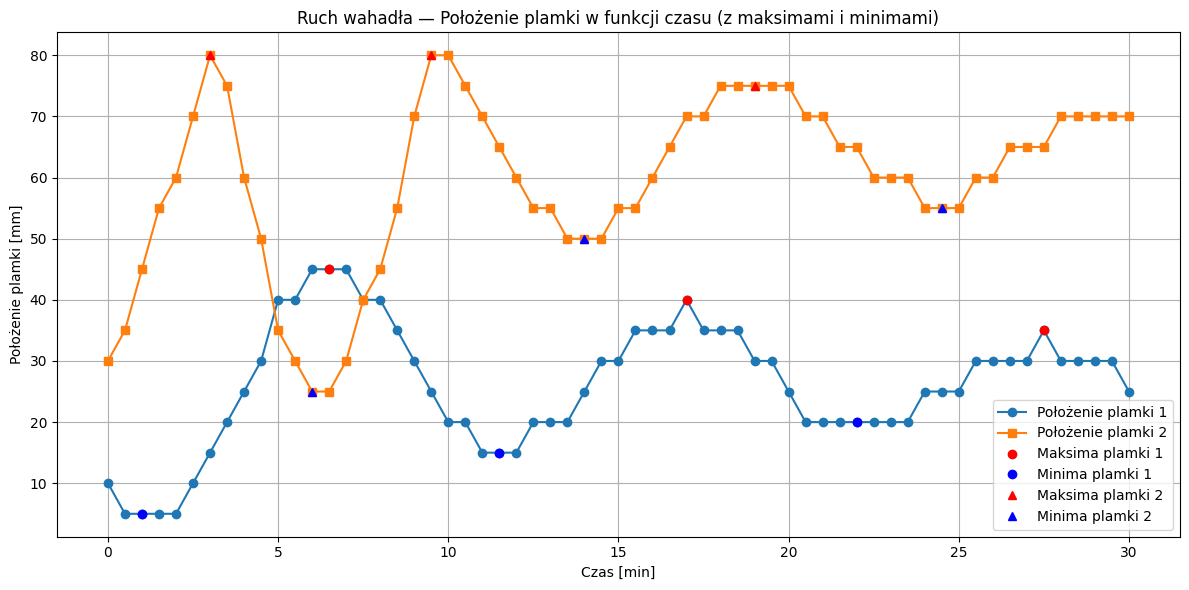

In [2]:
# Dane z tabeli (czas w minutach)
czas = [i * 0.5 for i in range(61)]

# Położenia plamek (z Twojej tabeli)

# fmt: off
pozycja_1 = [
    10, 5, 5, 5, 5, 10, 15, 20, 25, 30, 40, 40, 45, 45, 45, 40, 40, 35, 30, 25, 20, 20, 15, 15, 15, 20, 20, 20, 25, 30, 30,
    35, 35, 35, 40, 35, 35, 35, 30, 30, 25, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 30, 30, 30, 30, 35, 30, 30, 30, 30, 25
]
pozycja_2 = [
    30, 35, 45, 55, 60, 70, 80, 75, 60, 50, 35, 30, 25, 25, 30, 40, 45, 55, 70, 80, 80, 75, 70, 65, 60, 55, 55, 50, 50, 50, 55,
    55, 60, 65, 70, 70, 75, 75, 75, 75, 75, 70, 70, 65, 65, 60, 60, 60, 55, 55, 55, 60, 60, 65, 65, 65, 70, 70, 70, 70, 70
]
# fmt: on

# Tworzymy DataFrame
df = pd.DataFrame(
    {
        "Czas [min]": czas,
        "Położenie plamki 1": pozycja_1,
        "Położenie plamki 2": pozycja_2,
    }
)

# Wyszukiwanie maksimów i minimów
peaks_1, _ = find_peaks(pozycja_1)
troughs_1, _ = find_peaks([-x for x in pozycja_1])

peaks_2, _ = find_peaks(pozycja_2)
troughs_2, _ = find_peaks([-x for x in pozycja_2])

# Bierzemy tylko po 3 pierwsze maksima i minima
peaks_1 = peaks_1[:3]
troughs_1 = troughs_1[:3]
peaks_2 = peaks_2[:3]
troughs_2 = troughs_2[:3]

# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.plot(df["Czas [min]"], df["Położenie plamki 1"], "o-", label="Położenie plamki 1")
plt.plot(df["Czas [min]"], df["Położenie plamki 2"], "s-", label="Położenie plamki 2")

# Dodanie maksimów i minimów na wykresie (plamka 1)
plt.plot(
    df["Czas [min]"].iloc[peaks_1],
    df["Położenie plamki 1"].iloc[peaks_1],
    "ro",
    label="Maksima plamki 1",
)
plt.plot(
    df["Czas [min]"].iloc[troughs_1],
    df["Położenie plamki 1"].iloc[troughs_1],
    "bo",
    label="Minima plamki 1",
)

# Dodanie maksimów i minimów na wykresie (plamka 2)
plt.plot(
    df["Czas [min]"].iloc[peaks_2],
    df["Położenie plamki 2"].iloc[peaks_2],
    "r^",
    label="Maksima plamki 2",
)
plt.plot(
    df["Czas [min]"].iloc[troughs_2],
    df["Położenie plamki 2"].iloc[troughs_2],
    "b^",
    label="Minima plamki 2",
)

# Opis osi i tytuł
plt.xlabel("Czas [min]")
plt.ylabel("Położenie plamki [mm]")
plt.title("Ruch wahadła — Położenie plamki w funkcji czasu (z maksimami i minimami)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## Wyznaczanie położeń równowagi

$$
\begin{align*}
b_{01} & = \frac{\frac{b_1+b_3}{2}+b_2}{2} = \frac{b_1}{4} + \frac{b_2}{2} + \frac{b_3}{4} \rightarrow \text{pierwsze ustawienie}; \\
b_{02} & = \frac{\frac{b_1+b_3}{2}+b_2}{2} = \frac{b_1}{4} + \frac{b_2}{2} + \frac{b_3}{4} \rightarrow \text{drugie ustawienie}.
\end{align*}
$$


In [3]:
# print(df["Położenie plamki 1"].iloc[peaks_1])
# print(df["Położenie plamki 1"].iloc[troughs_1])
# print(df["Położenie plamki 2"].iloc[peaks_2])
# print(df["Położenie plamki 2"].iloc[troughs_2])

print(df["Czas [min]"].iloc[peaks_1])
print(df["Czas [min]"].iloc[troughs_1])
print(df["Czas [min]"].iloc[peaks_2])
print(df["Czas [min]"].iloc[troughs_2])

# Obliczanie średnich okresów dla obu plamek
T1_peaks = np.diff(df["Czas [min]"].iloc[peaks_1])
T1_troughs = np.diff(df["Czas [min]"].iloc[troughs_1])
T2_peaks = np.diff(df["Czas [min]"].iloc[peaks_2])
T2_troughs = np.diff(df["Czas [min]"].iloc[troughs_2])

print(T1_peaks)
print(T1_troughs)
print(T2_peaks)
print(T2_troughs)

# Średnie okresy
T1_avg = np.mean([np.mean(T1_peaks), np.mean(T1_troughs)])
T2_avg = np.mean([np.mean(T2_peaks), np.mean(T2_troughs)])

print(f"Średni okres dla plamki 1: {T1_avg:.2f} min")
print(f"Średni okres dla plamki 2: {T2_avg:.2f} min")

13     6.5
34    17.0
55    27.5
Name: Czas [min], dtype: float64
2      1.0
23    11.5
44    22.0
Name: Czas [min], dtype: float64
6      3.0
19     9.5
38    19.0
Name: Czas [min], dtype: float64
12     6.0
28    14.0
49    24.5
Name: Czas [min], dtype: float64
[10.5 10.5]
[10.5 10.5]
[6.5 9.5]
[ 8.  10.5]
Średni okres dla plamki 1: 10.50 min
Średni okres dla plamki 2: 8.62 min


In [4]:
def oscillation_center(b1: int, b2: int, b3: int):
    return ((b1 + b3) / 2 + b2) / 2


b01 = oscillation_center(45, 15, 40)
b02 = oscillation_center(80, 50, 75)
Delta_b = b02 - b01

print(b01, b02)
print(Delta_b)

28.75 63.75
35.0


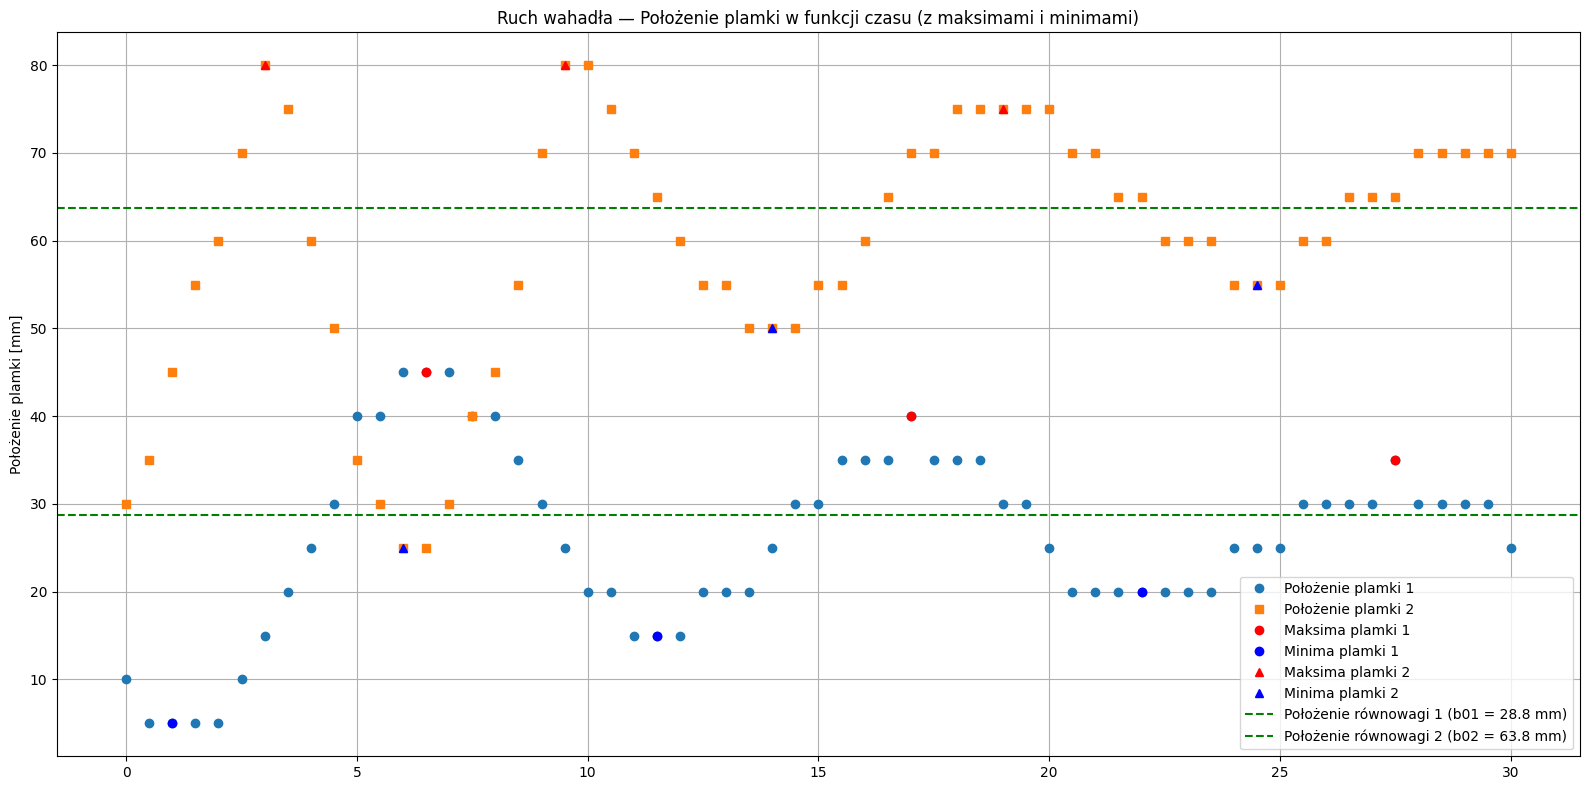

In [5]:
import matplotlib.pyplot as plt


# Rysowanie wykresu
plt.figure(figsize=(16, 8))
plt.plot(df["Czas [min]"], df["Położenie plamki 1"], "o", label="Położenie plamki 1")
plt.plot(df["Czas [min]"], df["Położenie plamki 2"], "s", label="Położenie plamki 2")

# Dodanie maksimów i minimów na wykresie (plamka 1)
plt.plot(
    df["Czas [min]"].iloc[peaks_1],
    df["Położenie plamki 1"].iloc[peaks_1],
    "ro",
    label="Maksima plamki 1",
)
plt.plot(
    df["Czas [min]"].iloc[troughs_1],
    df["Położenie plamki 1"].iloc[troughs_1],
    "bo",
    label="Minima plamki 1",
)

# Dodanie maksimów i minimów na wykresie (plamka 2)
plt.plot(
    df["Czas [min]"].iloc[peaks_2],
    df["Położenie plamki 2"].iloc[peaks_2],
    "r^",
    label="Maksima plamki 2",
)
plt.plot(
    df["Czas [min]"].iloc[troughs_2],
    df["Położenie plamki 2"].iloc[troughs_2],
    "b^",
    label="Minima plamki 2",
)

# Dodanie linii położeń równowagi
plt.axhline(
    y=b01,
    color="g",
    linestyle="--",
    label=f"Położenie równowagi 1 (b01 = {b01:.1f} mm)",
)
plt.axhline(
    y=b02,
    color="g",
    linestyle="--",
    label=f"Położenie równowagi 2 (b02 = {b02:.1f} mm)",
)

# Opis osi i tytuł
plt.ylabel("Położenie plamki [mm]")
plt.title("Ruch wahadła — Położenie plamki w funkcji czasu (z maksimami i minimami)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## Stała grawitacyjna

$$
G = \frac{\pi^2 r^2 d \Delta b}{MT^2L}
$$


In [6]:
L = 0.86
T = 10.5 * 60
M = 1.5
r = 0.047
d = 0.05
Delta_b_meter = Delta_b * 1e-3

G = (np.pi**2 * r**2 * d * Delta_b_meter) / (M * T**2 * L)
print(G)

7.45182591704141e-11


## Niepewność


In [7]:
def argh():
    Delta_T = 30
    u_T = Delta_T / np.sqrt(3)

    Delta_b = 0.005
    u_b = Delta_b / np.sqrt(3)

    u_Delta_b = np.sqrt(3 / 8) * u_b
    print(u_Delta_b)

In [9]:
print(Delta_b)

35.0


$$
\Delta G = | \frac{-2G}{T} \Delta T | + | \frac{G}{\Delta b} \Delta( \Delta b ) |
$$


In [10]:
Delta_T = 60
Delta_Delta_b = 0.01
Delta_b_meter = Delta_b * 1e-3

Delta_G = np.abs(-2 * G / T * Delta_T) + np.abs(G / Delta_b_meter * Delta_Delta_b)
print(Delta_G)

3.548488531924481e-11


## Masa Ziemi

$$
   M_Z = \frac{gR_Z^2}{G}
$$


In [11]:
g = 9.81
R_Z = 6.38 * 10**6
M_z = g * R_Z**2 / G
print(M_z)

5.358554647483468e+24
